In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = {'POWERSAVER': [(13.01, 37.56903672218323), (9.32, 39.025575160980225), (9.18, 37.829806089401245), (9.0, 37.78133845329285), (7.8, 37.78576731681824), (9.05, 38.10055661201477), (9.32, 37.83936858177185), (10.0, 38.778165102005005), (8.88, 37.93213176727295), (9.91, 37.84086036682129), (10.9, 37.89590048789978), (9.48, 37.759822845458984), (9.7, 37.929293394088745), (8.64, 37.90114784240723), (8.59, 37.90605115890503), (9.08, 37.64376997947693), (9.07, 37.614118337631226), (11.81, 37.5761194229126), (9.9, 37.68035912513733), (9.95, 38.21646189689636), (8.98, 38.07823038101196), (8.72, 38.925965309143066), (8.3, 37.67270541191101), (9.04, 37.91279864311218), (9.54, 37.807323932647705), (10.64, 37.719133615493774), (9.91, 37.87265753746033), (8.74, 37.77679371833801), (12.69, 37.89948582649231), (11.23, 37.823463439941406)], 'BALANCED': [(19.72, 37.42694640159607), (19.98, 37.12114667892456), (19.93, 37.20482325553894), (19.01, 37.0352725982666), (19.01, 37.03854155540466), (20.27, 37.206748247146606), (20.48, 37.082050800323486), (20.18, 37.01561164855957), (19.76, 37.03057551383972), (19.17, 37.07963943481445), (20.02, 37.07577919960022), (19.35, 37.14952206611633), (20.09, 37.0286078453064), (20.08, 37.07191729545593), (19.82, 37.1477575302124), (20.13, 37.1712543964386), (20.66, 37.03317165374756), (19.31, 37.17532968521118), (20.62, 37.172890424728394), (19.06, 37.130364418029785), (19.8, 37.04302668571472), (19.37, 37.27872562408447), (21.33, 37.00361371040344), (19.36, 37.124398708343506), (20.32, 37.031423807144165), (19.36, 36.993627309799194), (20.17, 37.1424925327301), (19.97, 37.20175814628601), (20.31, 37.138307332992554), (20.32, 37.184011697769165)], 'PERFORMANCE': [(20.15, 37.19729709625244), (19.56, 37.01685857772827), (19.91, 37.09906983375549), (19.98, 37.25739669799805), (19.86, 37.042869329452515), (20.42, 37.088329553604126), (20.27, 37.13783597946167), (20.3, 37.05734419822693), (20.48, 36.96761989593506), (19.93, 37.06463885307312), (20.99, 37.066537380218506), (19.83, 37.02418041229248), (20.81, 37.09447240829468), (20.25, 36.9539794921875), (20.6, 37.12875056266785), (19.78, 37.02247738838196), (20.81, 36.96053218841553), (19.64, 36.97470474243164), (20.9, 36.952518939971924), (19.82, 37.014878034591675), (20.72, 37.17040157318115), (19.77, 37.06834173202515), (18.89, 37.023329734802246), (20.77, 37.09444856643677), (19.65, 36.99477005004883), (19.72, 37.15871334075928), (19.86, 37.115187883377075), (19.52, 36.958566188812256), (20.07, 36.94826889038086), (20.58, 36.936718225479126)]}

for power_mode in results:
  for idx, measurement in enumerate(results[power_mode]):
    results[power_mode][idx]= (measurement[0] * measurement[1], measurement[1])

print(results)
results_energy = {}
results_time = {}
for profile, data in results.items():
    energy, time = zip(*data)
    results_energy[profile] = energy
    results_time[profile] = time
    
df_energy = pd.DataFrame(results_energy)
df_time = pd.DataFrame(results_time)

{'POWERSAVER': [(488.77316775560377, 37.56903672218323), (363.7183605003357, 39.025575160980225), (347.2776199007034, 37.829806089401245), (340.0320460796356, 37.78133845329285), (294.72898507118225, 37.78576731681824), (344.8100373387337, 38.10055661201477), (352.66291518211364, 37.83936858177185), (387.78165102005005, 38.778165102005005), (336.8373300933838, 37.93213176727295), (375.00292623519897, 37.84086036682129), (413.0653153181076, 37.89590048789978), (357.9631205749512, 37.759822845458984), (367.9141459226608, 37.929293394088745), (327.4659173583985, 37.90114784240723), (325.6129794549942, 37.90605115890503), (341.8054314136505, 37.64376997947693), (341.1600533223152, 37.614118337631226), (443.7739703845978, 37.5761194229126), (373.0355553388596, 37.68035912513733), (380.2537958741188, 38.21646189689636), (341.9425088214874, 38.07823038101196), (339.4344174957276, 38.925965309143066), (312.6834549188614, 37.67270541191101), (342.7316997337341, 37.91279864311218), (360.68187031

In [3]:
df_energy.mean()

POWERSAVER     367.122335
BALANCED       738.593029
PERFORMANCE    745.805992
dtype: float64

In [4]:
df_energy.std()

POWERSAVER     45.509262
BALANCED       20.360003
PERFORMANCE    18.733309
dtype: float64

Text(0, 0.5, 'Energy (J)')

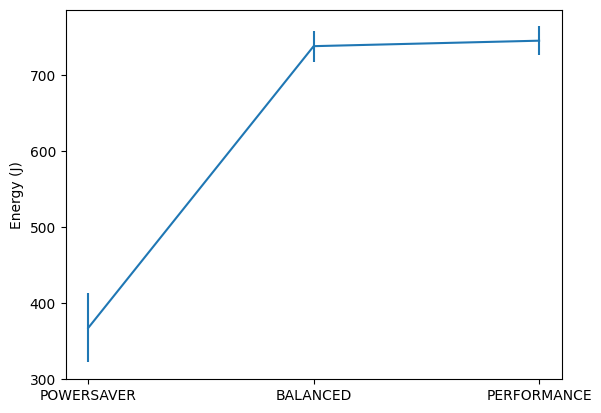

In [5]:
fig, ax = plt.subplots()

ax.errorbar(df_energy.mean().index, df_energy.mean().values, yerr=df_energy.std().values)
ax.set_ylabel('Energy (J)')

Text(0, 0.5, 'Time (s)')

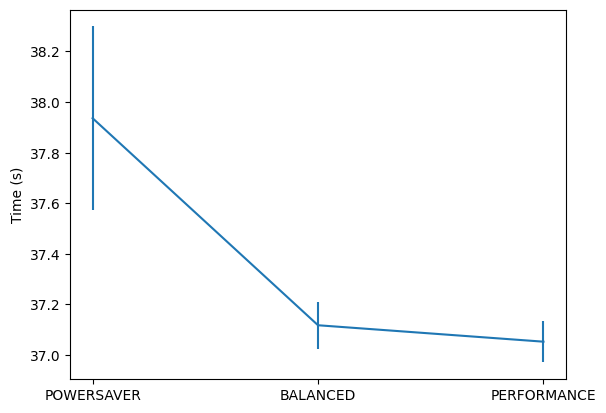

In [6]:
fig, ax = plt.subplots()

ax.errorbar(df_time.mean().index, df_time.mean().values, yerr=df_time.std().values)
ax.set_ylabel('Time (s)')

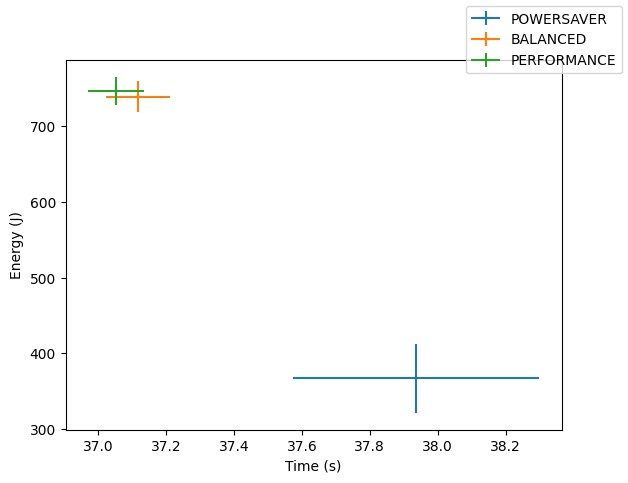

In [7]:
fig, ax = plt.subplots()

ax.errorbar(df_time['POWERSAVER'].mean(), 
            df_energy['POWERSAVER'].mean(), 
            xerr=df_time['POWERSAVER'].std(), 
            yerr=df_energy['POWERSAVER'].std()
           , label='POWERSAVER')

ax.errorbar(df_time['BALANCED'].mean(), 
            df_energy['BALANCED'].mean(), 
            xerr=df_time['BALANCED'].std(), 
            yerr=df_energy['BALANCED'].std()
           , label='BALANCED')

ax.errorbar(df_time['PERFORMANCE'].mean(), 
            df_energy['PERFORMANCE'].mean(), 
            xerr=df_time['PERFORMANCE'].std(), 
            yerr=df_energy['PERFORMANCE'].std(),
           label='PERFORMANCE')

ax.set_ylabel('Energy (J)')
ax.set_xlabel('Time (s)')

fig.legend()

# Exploratory Analysis

Text(0, 0.5, 'Energy (J)')

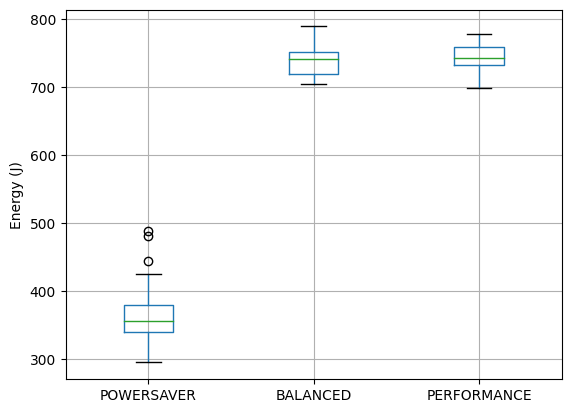

In [8]:
fig, ax = plt.subplots()

df_energy.boxplot(ax=ax)
ax.set_ylabel('Energy (J)')

Text(0, 0.5, 'Time (s)')

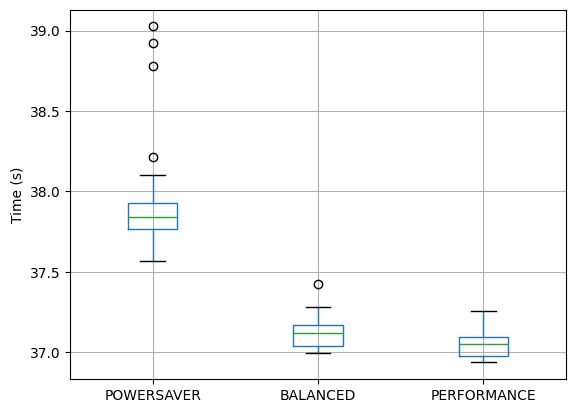

In [10]:
fig, ax = plt.subplots()

df_time.boxplot(ax=ax)
ax.set_ylabel('Time (s)')

Text(0, 0.5, 'Energy (J)')

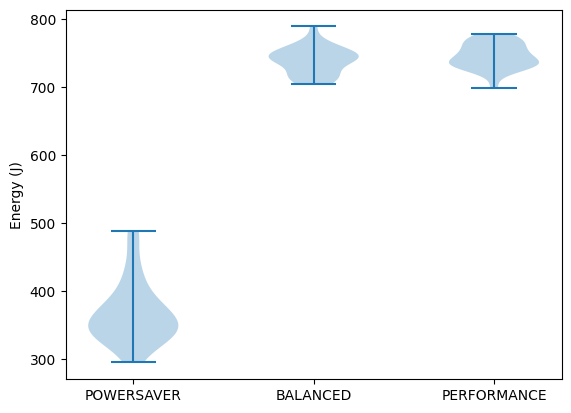

In [11]:
fig, ax = plt.subplots()

ax.violinplot([df_energy['POWERSAVER'].tolist(), df_energy['BALANCED'].tolist(), df_energy['PERFORMANCE'].tolist()])
ax.set_xticks([1.0,2.0,3.0]) 
ax.set_xticklabels(['POWERSAVER', 'BALANCED', 'PERFORMANCE'])
ax.set_ylabel('Energy (J)')

Text(0, 0.5, 'Time (s)')

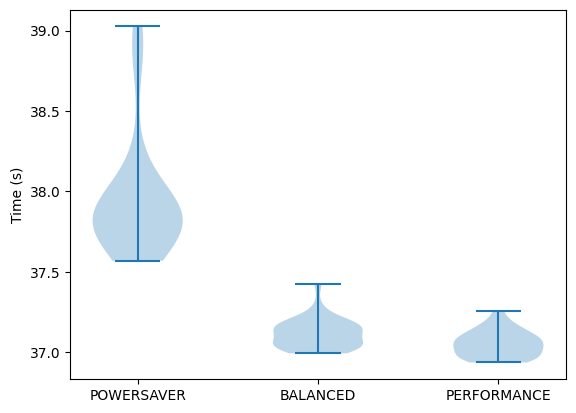

In [12]:
fig, ax = plt.subplots()

ax.violinplot([df_time['POWERSAVER'].tolist(), df_time['BALANCED'].tolist(), df_time['PERFORMANCE'].tolist()])
ax.set_xticks([1.0,2.0,3.0]) 
ax.set_xticklabels(['POWERSAVER', 'BALANCED', 'PERFORMANCE'])
ax.set_ylabel('Time (s)')

Text(0.5, 0, 'Energy (J)')

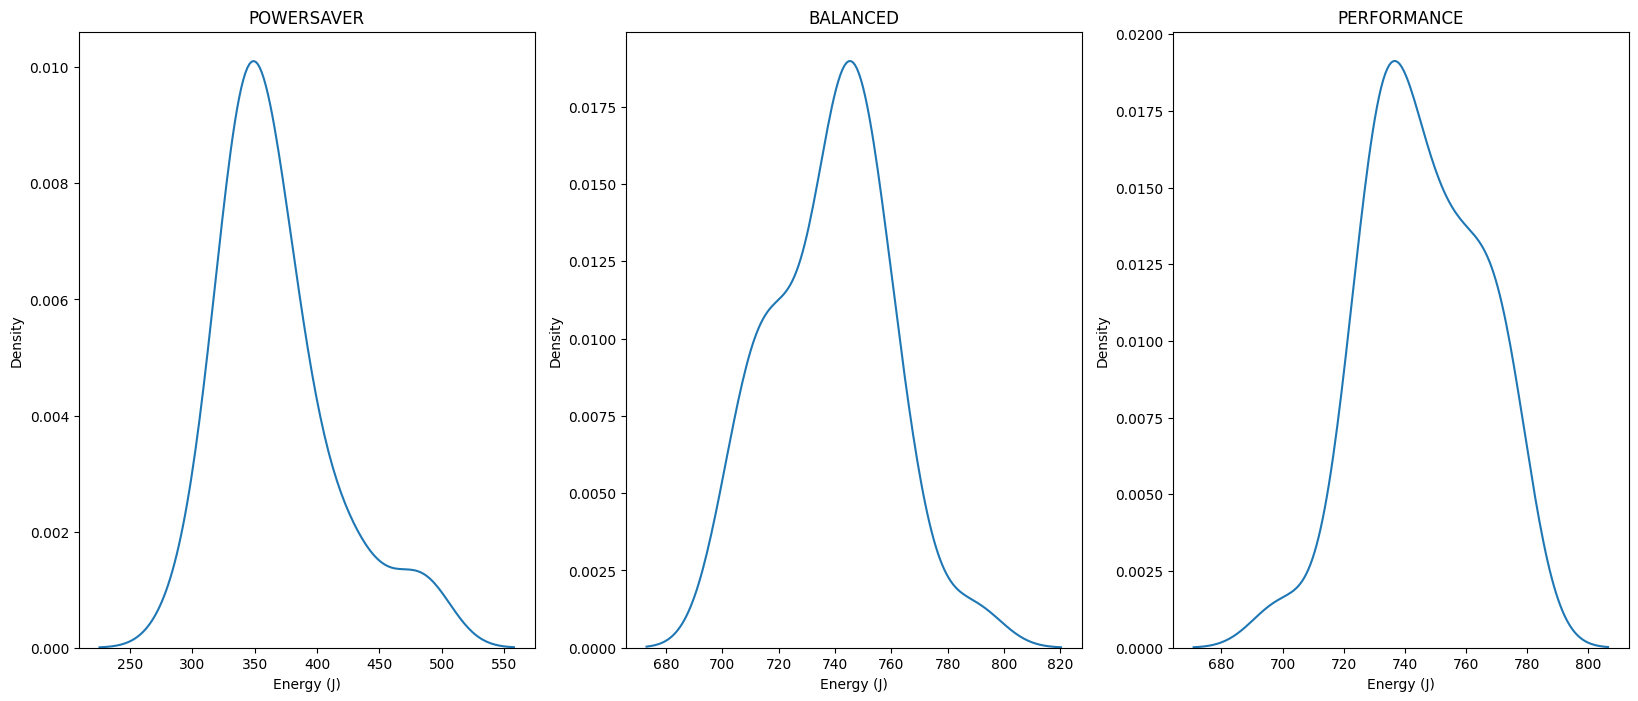

In [13]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.kdeplot(df_energy['POWERSAVER'],ax=axs[0])
sns.kdeplot(df_energy['BALANCED'],ax=axs[1])
sns.kdeplot(df_energy['PERFORMANCE'],ax=axs[2])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Energy (J)')
axs[1].set_xlabel('Energy (J)')
axs[2].set_xlabel('Energy (J)')

Text(0.5, 0, 'Time (s)')

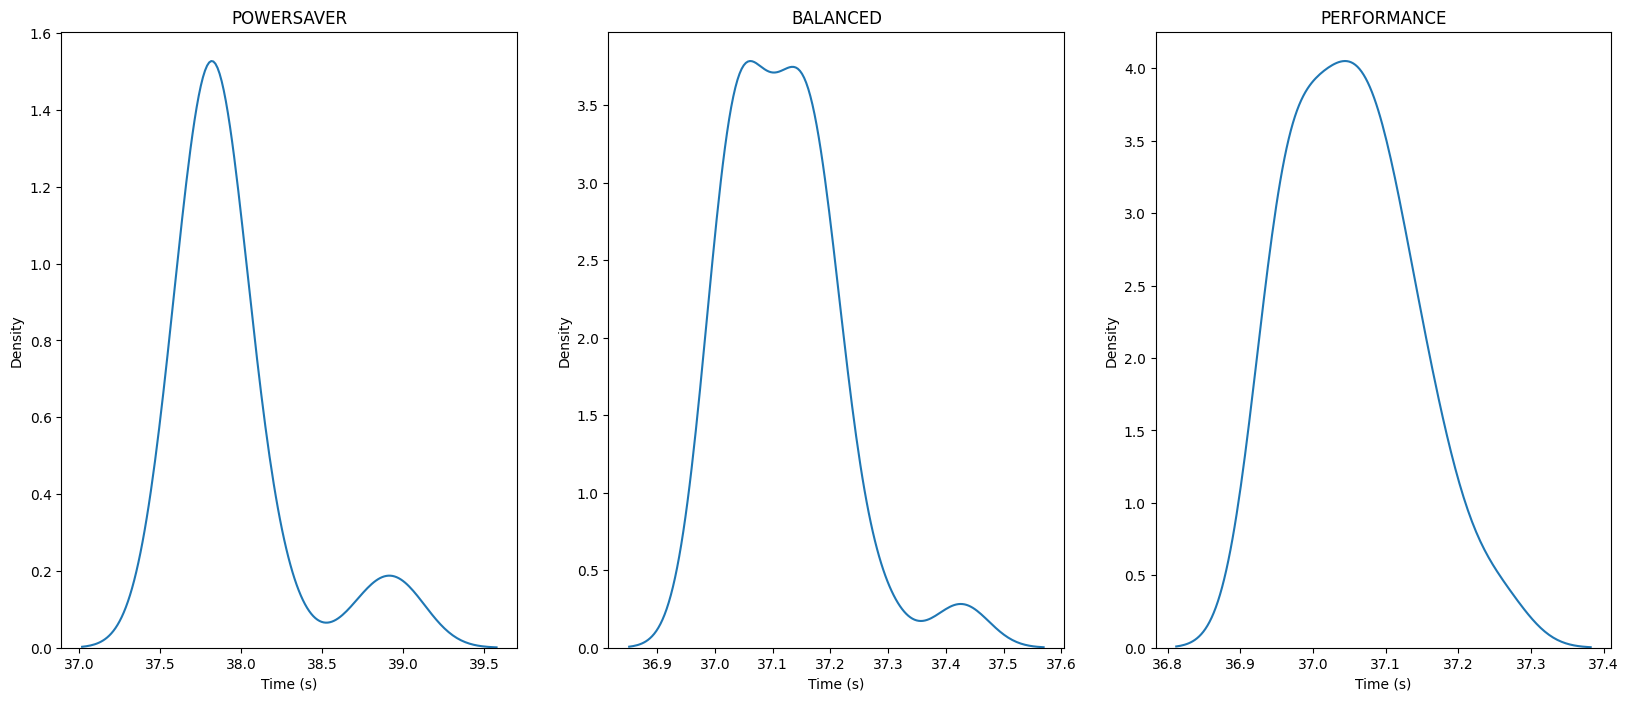

In [14]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.kdeplot(df_time['POWERSAVER'],ax=axs[0])
sns.kdeplot(df_time['BALANCED'],ax=axs[1])
sns.kdeplot(df_time['PERFORMANCE'],ax=axs[2])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')

Text(0.5, 0, 'Energy (J)')

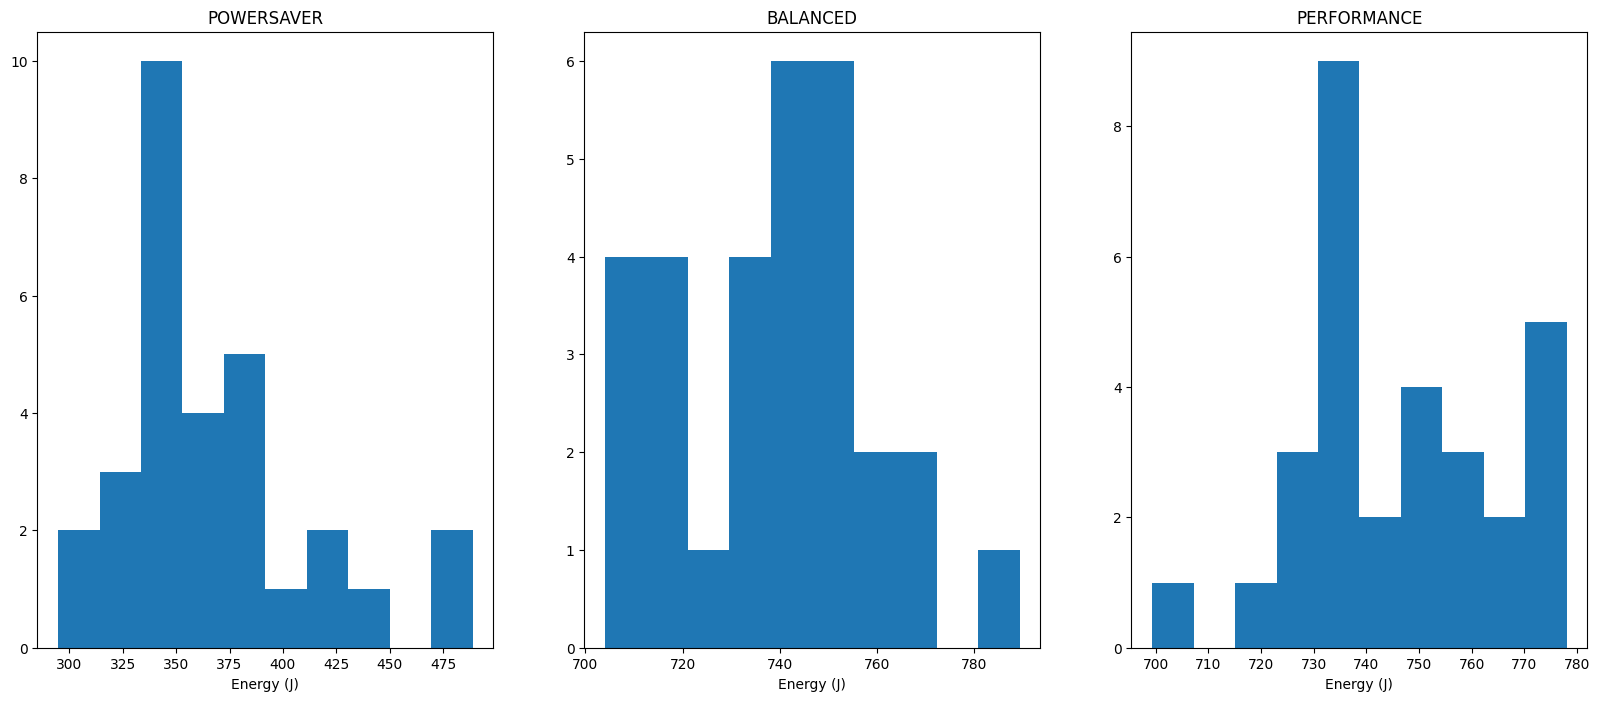

In [16]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

axs[0].hist(df_energy['POWERSAVER'])
axs[1].hist(df_energy['BALANCED'])
axs[2].hist(df_energy['PERFORMANCE'])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Energy (J)')
axs[1].set_xlabel('Energy (J)')
axs[2].set_xlabel('Energy (J)')

Text(0.5, 0, 'Time (s)')

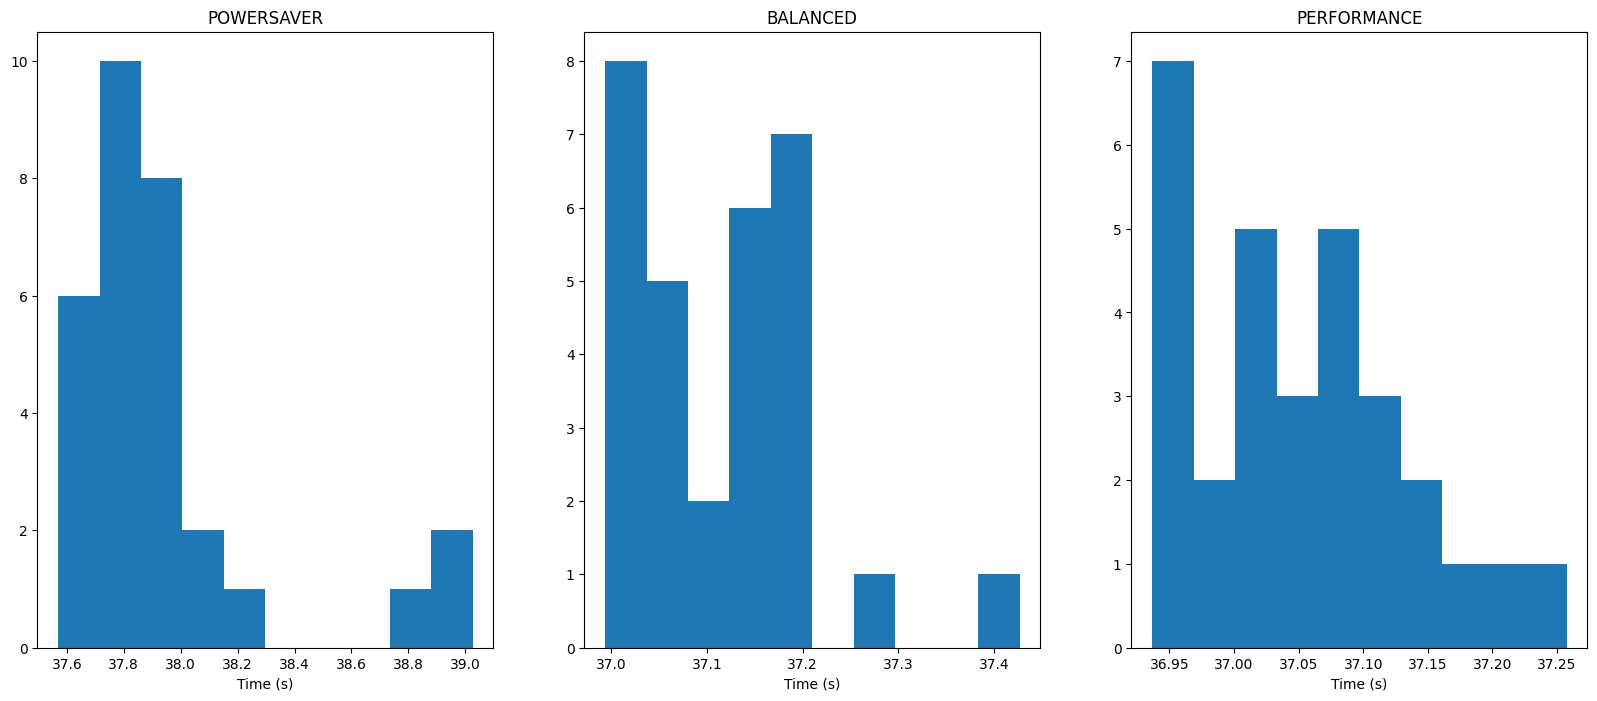

In [15]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

axs[0].hist(df_time['POWERSAVER'])
axs[1].hist(df_time['BALANCED'])
axs[2].hist(df_time['PERFORMANCE'])
axs[0].set_title('POWERSAVER')
axs[1].set_title('BALANCED')
axs[2].set_title('PERFORMANCE')
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
axs[2].set_xlabel('Time (s)')

## Shapiro-Wilk test (check normality)

In [17]:
from scipy.stats import *

In [18]:
p_saver = shapiro(df_energy['POWERSAVER'])[1]
p_balanced = shapiro(df_energy['BALANCED'])[1]
p_performance = shapiro(df_energy['PERFORMANCE'])[1]

for profile, p_value in zip(df_energy.columns, [p_saver, p_balanced, p_performance]):
    test = 'ARE' if p_value>=0.05 else 'ARE NOT'
    print(f'The energy values for {profile} {test} Normal, p-value={p_value}')

The energy values for POWERSAVER ARE NOT Normal, p-value=0.0048632253892719746
The energy values for BALANCED ARE Normal, p-value=0.4125010669231415
The energy values for PERFORMANCE ARE Normal, p-value=0.34595099091529846


In [19]:
p_saver = shapiro(df_time['POWERSAVER'])[1]
p_balanced = shapiro(df_time['BALANCED'])[1]
p_performance = shapiro(df_time['PERFORMANCE'])[1]

for profile, p_value in zip(df_energy.columns, [p_saver, p_balanced, p_performance]):
    test = 'ARE' if p_value>=0.05 else 'ARE NOT'
    print(f'The time values for {profile} {test} Normal, p-value={p_value}')

The time values for POWERSAVER ARE NOT Normal, p-value=4.365896529634483e-06
The time values for BALANCED ARE NOT Normal, p-value=0.008609632961452007
The time values for PERFORMANCE ARE Normal, p-value=0.23931783437728882


## Remove outliers

In [20]:
def remove_out_z_score(data):
    mean = data.mean()
    std = data.std()
    no_outliers = []
    for i in data:
        z = (i-mean)/std
        if z < 3:
            no_outliers.append(i)
    return no_outliers

In [21]:
energy_powersaver = remove_out_z_score(df_energy['POWERSAVER'])

len(energy_powersaver)

30

In [22]:
time_powersaver = remove_out_z_score(df_time['POWERSAVER'])

print(len(time_powersaver))
p_saver = shapiro(time_powersaver)[1]
print(p_saver)

29
1.0037617357738782e-05


In [23]:
time_balanced = remove_out_z_score(df_time['BALANCED'])

print(len(time_balanced))
p_balanced = shapiro(time_balanced)[1]
print(p_balanced)

29
0.14809125661849976


The time data for Balanced becomes normal after we remove the outliers.

# Statistical significance

Compare energy between Performance and Balanced (Both are Normal therefore we use the Welch's t-test)

In [24]:
ttest_ind(df_energy['BALANCED'], df_energy['PERFORMANCE'], equal_var=False)

Ttest_indResult(statistic=-1.4279441491339662, pvalue=0.1587074513318241)

Since the p-value is greater than 0.05 then we conclude that the difference in energy consumption for Balanced and Performance profile is not statistically significant.

All other comparasion will have at least one sample that is not normal therefore we will use from now on the Mann-Whitney U test

We compare the profile Powersaver with Balanced and Performance in terms of energy.

In [25]:
mannwhitneyu(df_energy['POWERSAVER'], df_energy['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11)

In [26]:
mannwhitneyu(df_energy['POWERSAVER'], df_energy['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=0.0, pvalue=3.019859359162157e-11)

In both cases the p-value is less than 0.05 therefore the difference is statistically significant meaning the profile Powersaver is indeed more energy efficient.

### Check time 

In [27]:
ttest_ind(time_balanced, df_time['PERFORMANCE'], equal_var=False)

Ttest_indResult(statistic=2.6561714548799142, pvalue=0.010240882505193625)

So the difference in time between performance and balanced is statistically significant.

In [28]:
mannwhitneyu(df_time['POWERSAVER'], df_time['BALANCED'], alternative='two-sided')

MannwhitneyuResult(statistic=900.0, pvalue=3.019859359162157e-11)

In [29]:
mannwhitneyu(df_time['POWERSAVER'], df_time['PERFORMANCE'], alternative='two-sided')

MannwhitneyuResult(statistic=900.0, pvalue=3.019859359162157e-11)

All the results according to time are statistically significant meaning that in the following ascending order the profiles take more time to perform the computations: Powersaver, Balanced, Performance

# Effect Size

## Median Difference

### Energy

In [30]:
df_energy['BALANCED'].median() - df_energy['POWERSAVER'].median()

386.6557872319221

In [31]:
df_energy['PERFORMANCE'].median() - df_energy['POWERSAVER'].median()

387.66425344944

In both cases the difference of median is around 10 W making the difference relevant.

### Time

In [32]:
time_balanced = np.array(time_balanced)
time_balanced.mean() - df_time['PERFORMANCE'].mean()

0.05428919463322046

In [33]:
df_time['POWERSAVER'].median() - df_time['BALANCED'].median()

0.7173417806625366

In [34]:
df_time['POWERSAVER'].median() - df_time['PERFORMANCE'].median()

0.7900077104568481

In this case the median does not show a huge difference in time.

## Percentage of pairs

In [35]:
import itertools 

def pair_percentage(data1, data2):
    pairs = list(itertools.product(data1.tolist(), data2.tolist()))

    supporting_pairs = 0
    for pair in pairs:
        if pair[0]>pair[1]:
            supporting_pairs+=1

    print(supporting_pairs/len(pairs))

### Energy

In [36]:
pair_percentage(df_energy['BALANCED'], df_energy['POWERSAVER'])

1.0


In [37]:
pair_percentage(df_energy['PERFORMANCE'], df_energy['POWERSAVER'])

1.0


The difference between powersaver and the other two profiles is confirmed to be significant since all pairs show that performance is more energy efficient than the other two profiles.

### Time

In [38]:
((time_balanced.mean() - df_time['PERFORMANCE'].mean())/df_time['PERFORMANCE'].mean())*100

0.14651753960637368

In [39]:
pair_percentage(df_time['POWERSAVER'], df_time['BALANCED'])

1.0


In [40]:
pair_percentage(df_time['POWERSAVER'], df_time['PERFORMANCE'])

1.0


We can see that the percentages are all above 50% supporting the median result. The difference in time between balanced and performance is negligable.

# Cohen's d

In [41]:
(time_balanced.mean() - df_time['PERFORMANCE'].mean())/(0.5*np.sqrt(time_balanced.var()+df_time['PERFORMANCE'].var()))

0.9851512513957033

So the effect is "large" by the rule of thumb almost a complete standerd deviation. This can be significant dependeing on training time (insignificant if training time is a couple of hours, becomes important if training takes a day).

# Cliffs delta

In [42]:
def cliffs_delta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

## Energy

In [43]:
cliffs_delta(df_energy['BALANCED'].tolist(), df_energy['POWERSAVER'].tolist())

(1.0, 'large')

In [44]:
cliffs_delta(df_energy['PERFORMANCE'].tolist(), df_energy['POWERSAVER'].tolist())

(1.0, 'large')

## Time

In [45]:
cliffs_delta(df_time['BALANCED'].tolist(), df_time['POWERSAVER'].tolist())

(-1.0, 'large')

In [46]:
cliffs_delta(df_time['PERFORMANCE'].tolist(), df_time['POWERSAVER'].tolist())

(-1.0, 'large')